In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc
import pandas as pd
import pathlib
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
data_name = 'adata_emt'
savepath = f'gwas_ritini/results/{data_name}/'
datapath = f'gwas_ritini/data/{data_name}'

adata = sc.read_h5ad(f'gwas_ritini/data/{data_name}_meld.h5ad')
# adata.obs['dpt_bin'] = pd.cut(adata.obs['meld_likelihood'], bins=4, labels=False)

gene_names = adata.var_names

# data = np.load(f'{datapath}_gaga.npz')
traj = np.load(f'{savepath}/mioflow_results/traj_gene_sp.npy')

In [4]:
traj.shape

(100, 100, 60)

In [5]:
traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
zero_mean_std_genes = (traj_mean.max(axis=0) - traj_mean.min(axis=0)) == 0
gene_names = gene_names[~zero_mean_std_genes]
traj_mean = traj_mean[:,~zero_mean_std_genes]
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))

trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T
# Get the indices of top k values for each row
topk = 5
top_k_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-topk])[0].mean(), axis=1)
# Sort the dataframe by mean of top k indices
trends_df_sorted = trends_df.iloc[top_k_indices.argsort()]

trends_df_sorted_numerical_index = trends_df_sorted.reset_index(drop=True)

# # Split indices into 5 groups using the cluster points
# cluster_pts = [816, 1740, 3120, 4032]
# cluster_groups = [
#     trends_df_sorted.index[:cluster_pts[0]].tolist(),
#     trends_df_sorted.index[cluster_pts[0]:cluster_pts[1]].tolist(),
#     trends_df_sorted.index[cluster_pts[1]:cluster_pts[2]].tolist(), 
#     trends_df_sorted.index[cluster_pts[2]:cluster_pts[3]].tolist(),
#     trends_df_sorted.index[cluster_pts[3]:].tolist()
# ]

# cluster_df = pd.DataFrame(np.arange(len(trends_df_sorted.index)), index=trends_df_sorted.index, columns=['number'])
# cluster_df['cluster'] = np.nan
# for i, cluster_group in enumerate(cluster_groups):
#     cluster_df.loc[cluster_group, 'cluster'] = i

In [54]:
candidate_genes = ['CellBody_Intensity_UpperQuartileIntensity_Cycle01_p16INK2a',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle05_Sox2',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle04_CyclinE1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle03_cMyc',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle09_p27Kip1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle08_KRAS',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle07_KLF4',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle06_CDK1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle19_pSTAT3Tyr705',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle14_GSK3b',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle16_EGFR',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle14_pRB',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle12_SLUG',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle13_CDK4',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle12_ERK',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle11_P53',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle20_PTEN',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle21_CD104',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle20_CD276',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle01_Ecadherin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle08_Cytokeratin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle02_TJP1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle12_PJak1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle02_EpCAM',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle15_betaCatenin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle01_DAPI',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle07_Pp38',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle13_mTOR',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle03_pSMAD23',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle10_LaminAC',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle15_phosP53',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle10_p21Waf1Cip1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle06_Ki67',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle13_Cav1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle20_GM130',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle19_YAP',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle08_pAKT473',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle06_SDHA',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle09_Caspase3Cleaved',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle09_OCT34',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle04_NCADHERIN',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle03_CyclinA1A2',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle01_CyclinB1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle02_ZEB1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle07_ALDHA1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle04_TWIST',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle05_CD44',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle05_pMEK1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle11_AktTHR308',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle10_Nestin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle14_CyclinD1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle11_Vim',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle16_Fibrilarin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle15_alphaTubulin',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle16_pS6',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle17_Nanog',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle18_H2AX',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle19_IRF3',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle17_PDL1',
       'CellBody_Intensity_UpperQuartileIntensity_Cycle17_cGAS']

(note: those “zero” ones are due to the fact that sc.pp.pca does an hvg beforehand, so only the top 2000 HVGs are used for PCA, and the ones that aren’t will be zero when reconstructing with PCA)


In [55]:
from stfe.gene_utils import get_markers_from_var_names

# candidate_genes = ["Cldn4", "Gdf15", "Galactin3", "Sfn",
# "Sftpb","Sftpc","Lamp3","Acoxl","Il33",
# "Rtkn2","Cav1","Vegfa","Sema3a","Sema3e",
# "Cdkn1a","Gdf15","Cldn4","Sprr1a","Lgals3",
# "Ccng1","Edn1","Clu","Atf3","Fosl1"]
to_plot_gene = get_markers_from_var_names(candidate_genes, adata.var_names, True, True)
print(len(to_plot_gene),len(candidate_genes))
print(len(to_plot_gene))
to_plot_gene = np.unique(to_plot_gene)

60 60
60


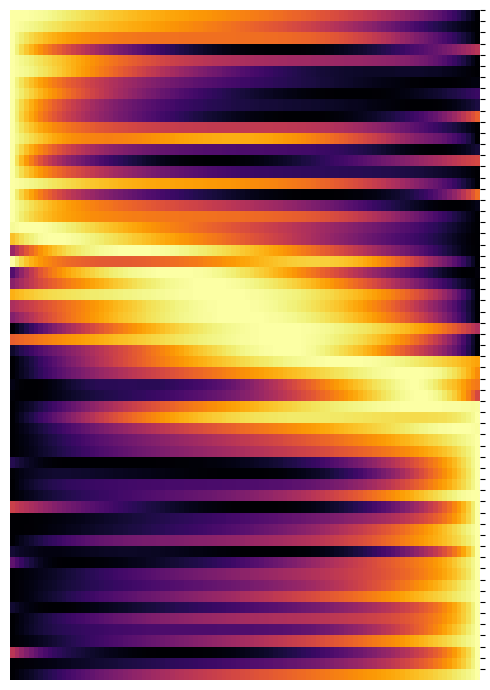

In [57]:
# Select genes to display on the y-axis
ytick_genes = to_plot_gene
ytick_positions = [trends_df_sorted.index.get_loc(gene) for gene in ytick_genes if gene in trends_df_sorted.index]
ytick_labels = [ytick_genes[i] for i, pos in enumerate(ytick_positions)]

# Create and save the heatmap separately
fig_heatmap = plt.figure(figsize=(5, 7))
ax_heatmap_only = plt.subplot(111)
sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
            cbar=False, ax=ax_heatmap_only, yticklabels=False)
# Set the same y-ticks as the combined figure
ax_heatmap_only.yaxis.set_label_position("right")
ax_heatmap_only.yaxis.tick_right()
# Remove x-axis ticks and labels
ax_heatmap_only.set_xticks([])
ax_heatmap_only.set_xticklabels([])

ax_heatmap_only.set_yticks(ytick_positions)
# ax_heatmap_only.set_yticklabels(ytick_labels, fontsize=10)
# Set the same x-ticks as the combined figure
# ax_heatmap_only.set_xticks(tick_positions)
# ax_heatmap_only.set_xticklabels([f'Day {d}' for d in days], fontsize=10)
plt.tight_layout()
# plt.savefig(f'{output_dir}/gene_heatmap_cluster_heatmap.pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)

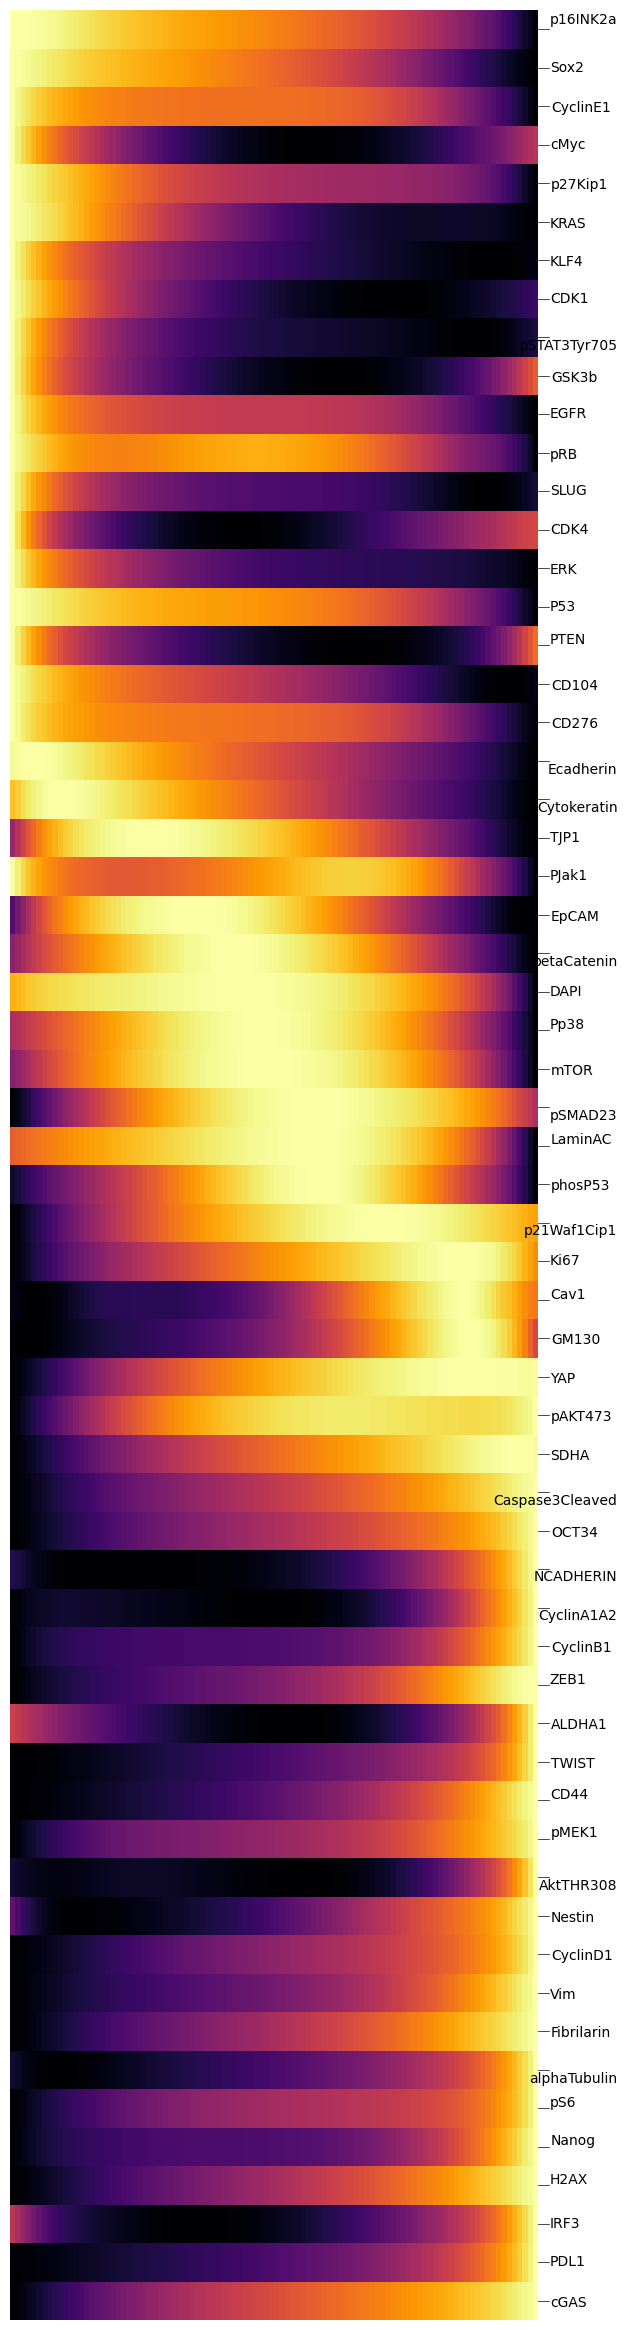

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Example: heatmap data is in `trends_df_sorted`
# ytick_positions, ytick_labels are your computed tick positions/labels

fig, ax = plt.subplots(figsize=(9, 30))

sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
            cbar=False, ax=ax, yticklabels=False)

# Move y-axis ticks/labels to the right
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticks([])
txt_genes = [s.rsplit("_", 1)[-1] for s in to_plot_gene]
ytick_labels = txt_genes  # Update y-axis labels

# 1) Increase right margin for more white space.
#    The smaller the value, the more space you get on the right.
plt.subplots_adjust(right=0.8)

x_boundary = trends_df_sorted.shape[1]
texts = []

for pos, label in zip(ytick_positions, ytick_labels):
    y_coord = pos + 0.5
    # 2) Increase the offset to push text further right.
    x_text = x_boundary + 2
    txt = ax.text(x_text, y_coord, label, ha='left', va='center', fontsize=10, clip_on=False)
    texts.append(txt)
    # Connect line from heatmap to label
    ax.plot([x_boundary, x_text], [y_coord, y_coord], 'k-', lw=0.5)

# 3) Adjust x-limits to ensure text is not clipped.
ax.set_xlim(0, x_boundary + 15)

# Use adjustText to avoid collisions
adjust_text(
    texts,
    only_move={'text': 'y'},
    # arrowprops=dict(arrowstyle='-', color='k', lw=0.5),
    # expand_text=(1, 1),
)

plt.show()